In [2]:
# import libraries here; add more as necessary
import pandas as pd
import matplotlib
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from collections import Counter
from plot_funcs import plot_values
from pandas_profiling import ProfileReport
%matplotlib inline
# magic word for producing visualizations in notebook


In [3]:
#importing Data
df = pd.read_csv("Hometrain-Copy1.csv")

In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
 df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.nunique()

Id              1460
MSSubClass        15
MSZoning           5
LotFrontage      110
LotArea         1073
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
OverallQual       10
OverallCond        9
YearBuilt        112
YearRemodAdd      61
RoofStyle          6
RoofMatl           8
Exterior1st       15
Exterior2nd       16
MasVnrType         4
MasVnrArea       327
ExterQual          4
ExterCond          5
Foundation         6
dtype: int64

In [9]:
df.isnull().sum().head(33)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
dtype: int64

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.drop(columns = 'Id', inplace = True)

In [12]:
# df['Alley'] = df['Alley'].str.replace('NA','None')

In [13]:
for columns in df:
    print(df[columns].value_counts())
    print('====================================================')

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Cor

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
14000

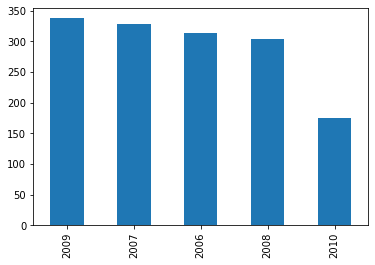

In [14]:
df['YrSold'].value_counts().plot(kind="bar")

### based on this chart, 2009 was the year many houses were sold.

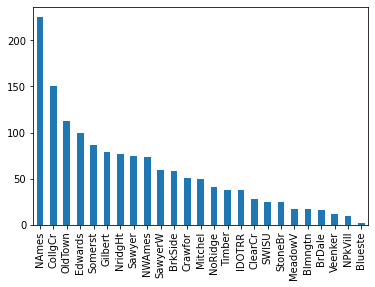

In [15]:
df['Neighborhood'].value_counts().plot(kind="bar")

### North Ames has the most houses

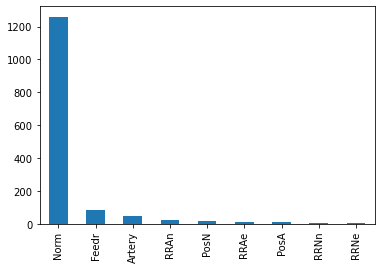

In [16]:
df['Condition1'].value_counts().plot(kind="bar")

### Houses with close proximity to all various condition

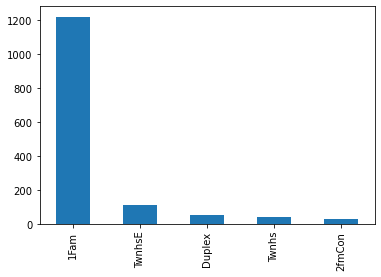

In [17]:
df['BldgType'].value_counts().plot(kind="bar")

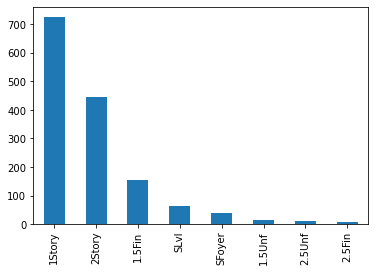

In [18]:
df['HouseStyle'].value_counts().plot(kind="bar")

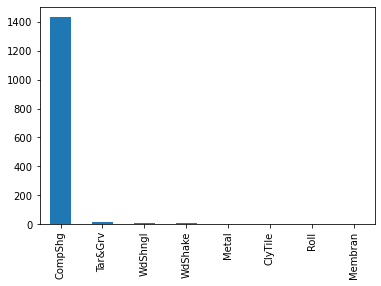

In [19]:
df['RoofMatl'].value_counts().plot(kind="bar")

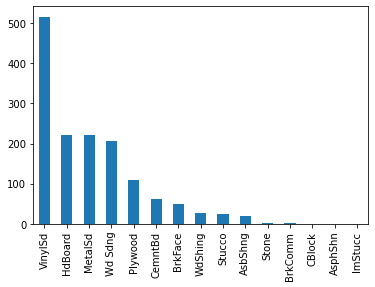

In [20]:
df['Exterior1st'].value_counts().plot(kind="bar")

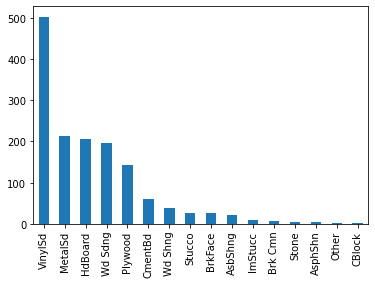

In [21]:
df['Exterior2nd'].value_counts().plot(kind="bar")

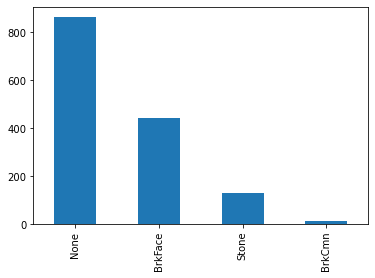

In [22]:
df['MasVnrType'].value_counts().plot(kind="bar")

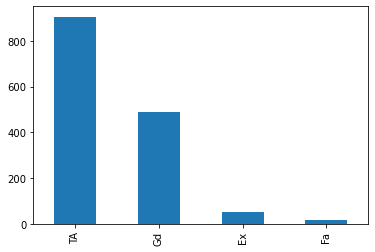

In [23]:
df['ExterQual'].value_counts().plot(kind="bar")

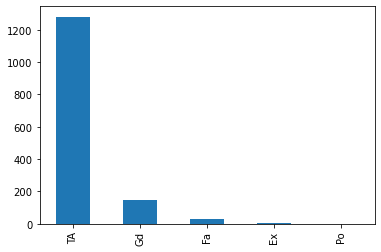

In [24]:
df['ExterCond'].value_counts().plot(kind="bar")

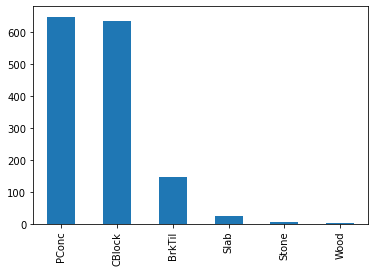

In [25]:
df['Foundation'].value_counts().plot(kind="bar")

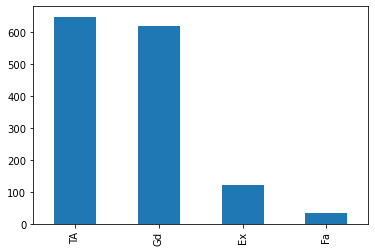

In [26]:
df['BsmtQual'].value_counts().plot(kind="bar")

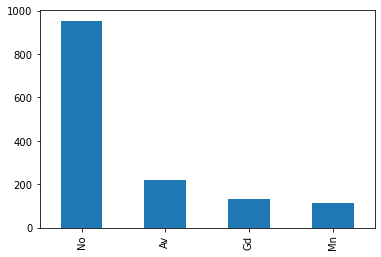

In [28]:
df['BsmtExposure'].value_counts().plot(kind="bar")

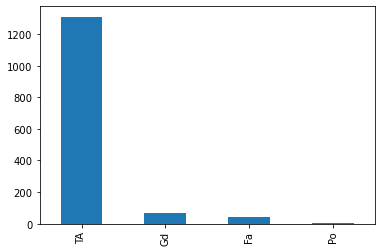

In [29]:
df['BsmtCond'].value_counts().plot(kind="bar")

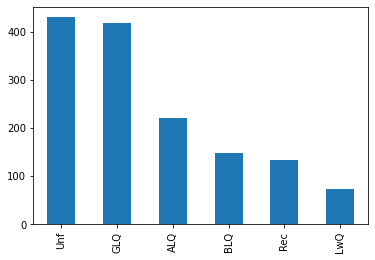

In [30]:
df['BsmtFinType1'].value_counts().plot(kind="bar")

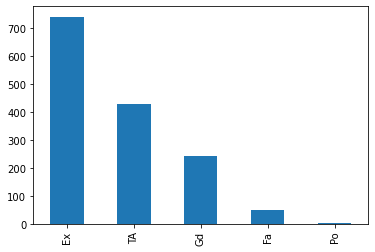

In [31]:
df['HeatingQC'].value_counts().plot(kind="bar")

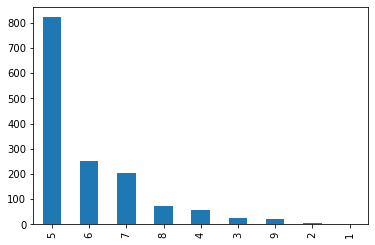

In [32]:
df['OverallCond'].value_counts().plot(kind="bar")

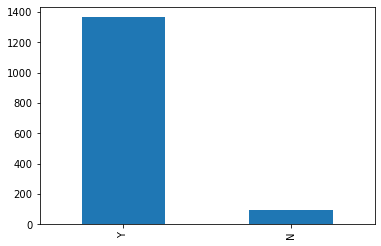

In [33]:
df['CentralAir'].value_counts().plot(kind="bar")

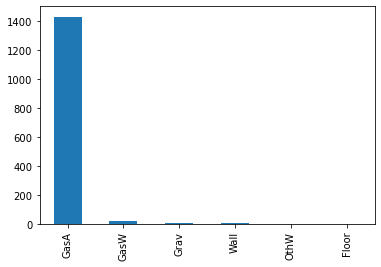

In [34]:
df['Heating'].value_counts().plot(kind="bar")

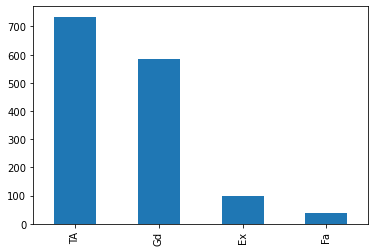

In [35]:
df['KitchenQual'].value_counts().plot(kind="bar")

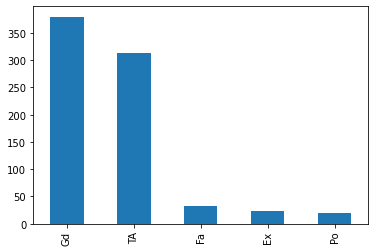

In [36]:
df['FireplaceQu'].value_counts().plot(kind="bar")

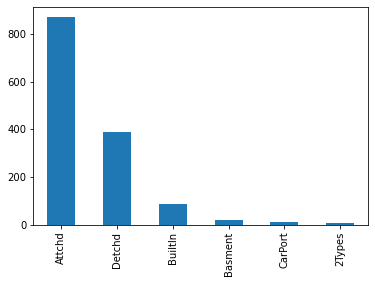

In [37]:
df['GarageType'].value_counts().plot(kind="bar")

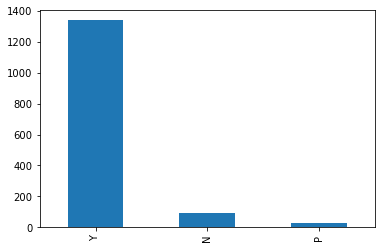

In [38]:
df['PavedDrive'].value_counts().plot(kind="bar")

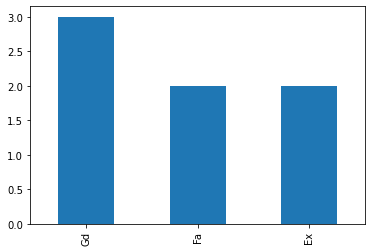

In [39]:
df['PoolQC'].value_counts().plot(kind="bar")

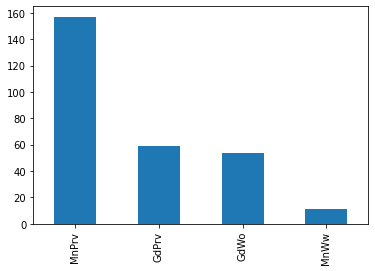

In [40]:
df['Fence'].value_counts().plot(kind="bar")

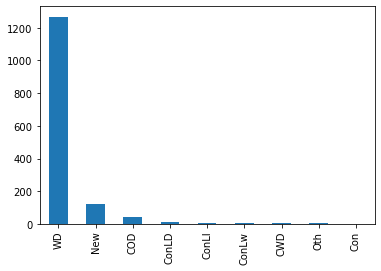

In [41]:
df['SaleType'].value_counts().plot(kind="bar")

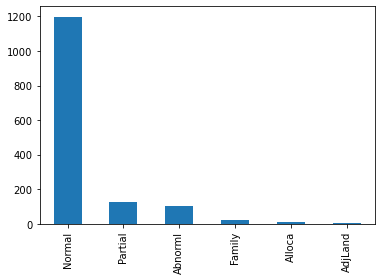

In [42]:
df['SaleCondition'].value_counts().plot(kind="bar")

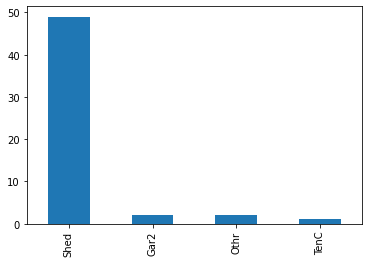

In [43]:
df['MiscFeature'].value_counts().plot(kind="bar")

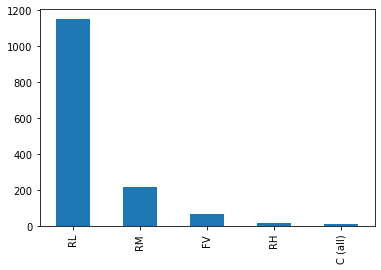

In [44]:
df['MSZoning'].value_counts().plot(kind="bar")

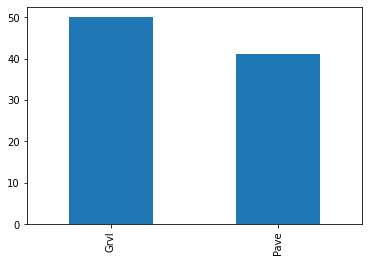

In [45]:
df['Alley'].value_counts().plot(kind="bar")

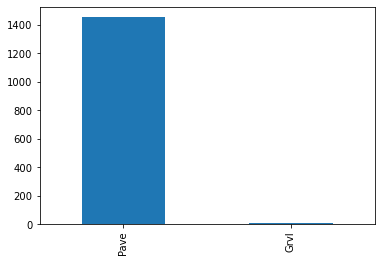

In [46]:
df['Street'].value_counts().plot(kind="bar")

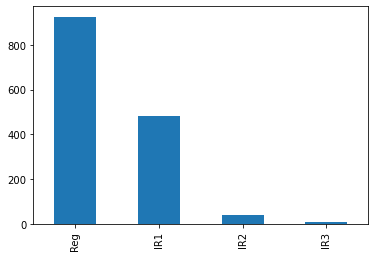

In [47]:
df['LotShape'].value_counts().plot(kind="bar")

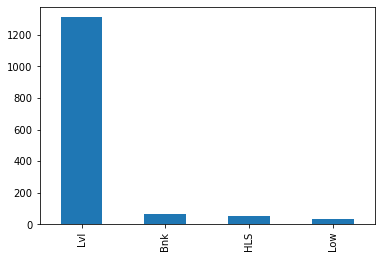

In [48]:
df['LandContour'].value_counts().plot(kind="bar")


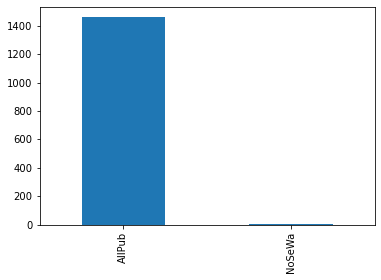

In [49]:
df['Utilities'].value_counts().plot(kind="bar")


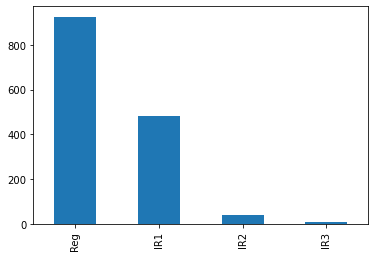

In [50]:
df['LotShape'].value_counts().plot(kind="bar")


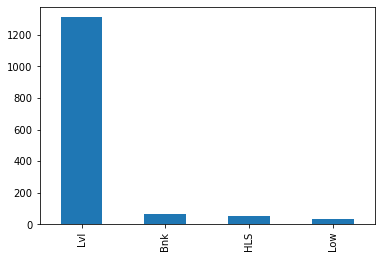

In [51]:
df['LandContour'].value_counts().plot(kind="bar")


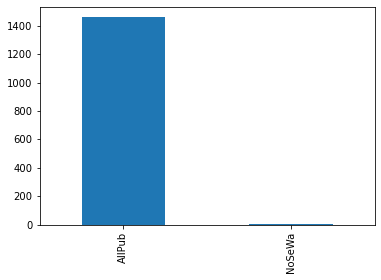

In [52]:
df['Utilities'].value_counts().plot(kind="bar")

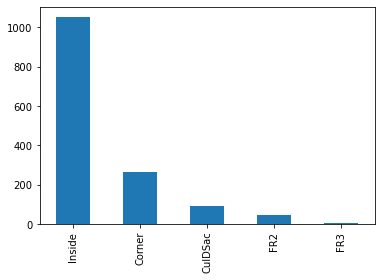

In [53]:
df['LotConfig'].value_counts().plot(kind="bar")

In [54]:
# for col in df.columns:
#    if  ((df[col].dtype == np.float64) | (df[col].dtype == np.int64)):
#        i=0
#        #Later
#    else :
#        print(col +' count plot \n') 
#        sns.countplot(x =col, data =df)
#        sns.plt.title(col +' count plot')  

In [55]:
# for col in df.columns:
#    if  ((df[col].dtype == np.float64) | (df[col].dtype == np.int64)):
#        i=0
#        #Later
#    else :
#        print(col +' count plot \n') 
#        sns.countplot(x =col, data =df)
#        sns.plt.title(col +' count plot')  

In [56]:
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [57]:
df_int = df.select_dtypes(include = 'int64').copy()
df_int.head(2)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500


In [58]:
df_flt = df.select_dtypes(include = 'float64').copy()
df_flt.head(2)

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0


In [59]:
df_cat['SalePrice'] = df.loc[df_cat.index, 'SalePrice'].copy()
ix = 1

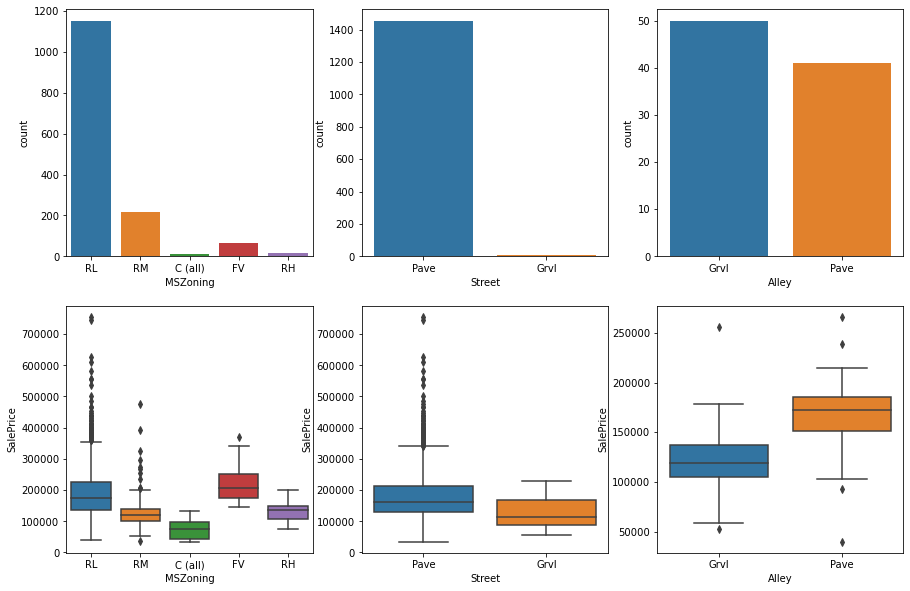

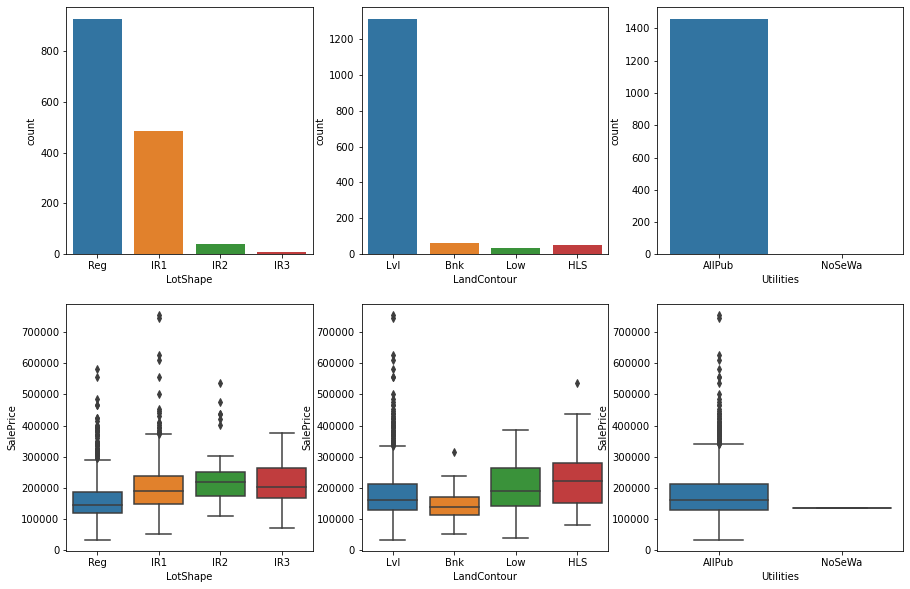

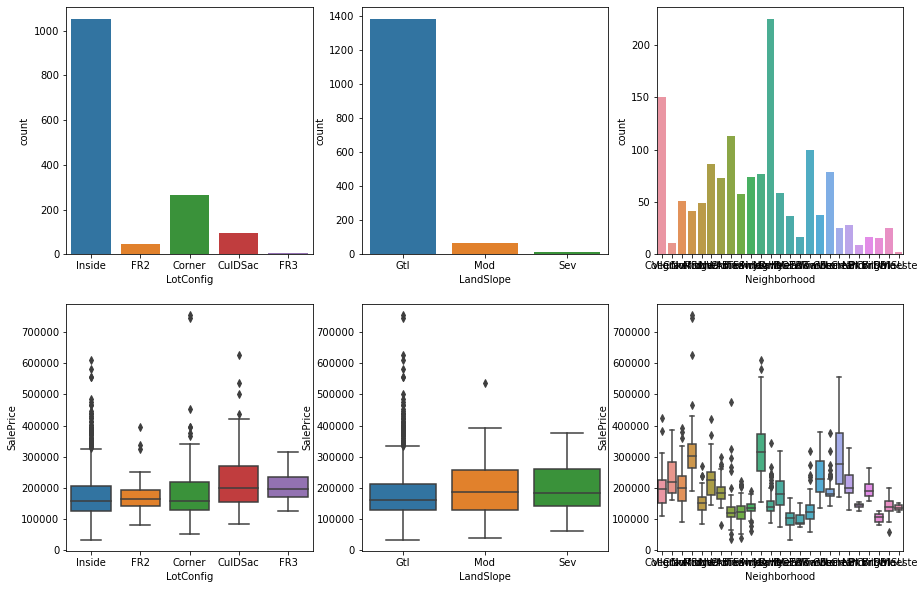

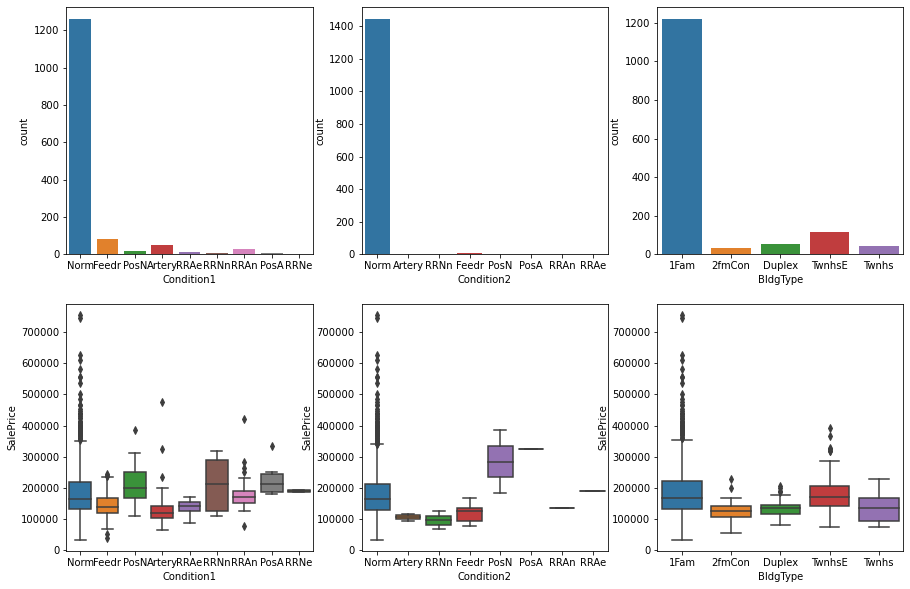

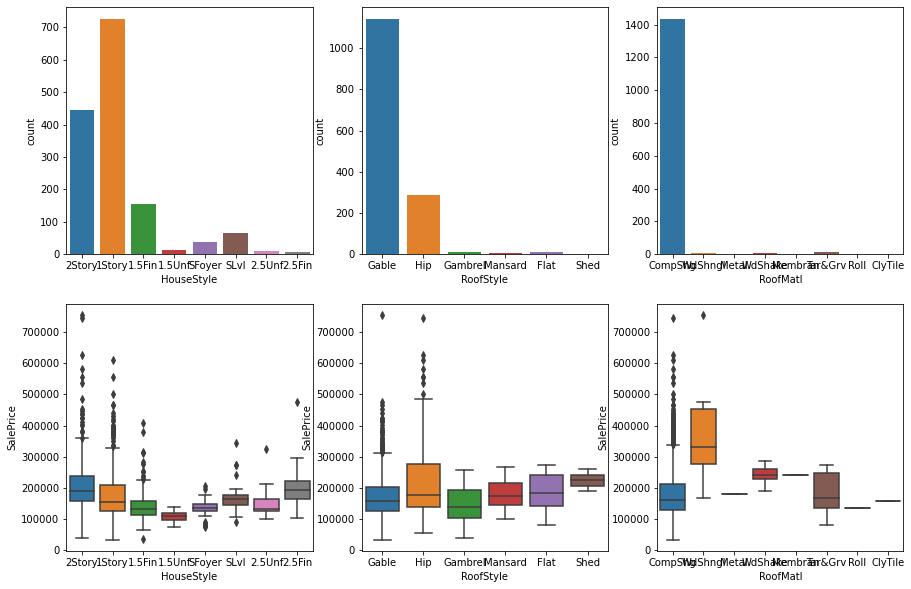

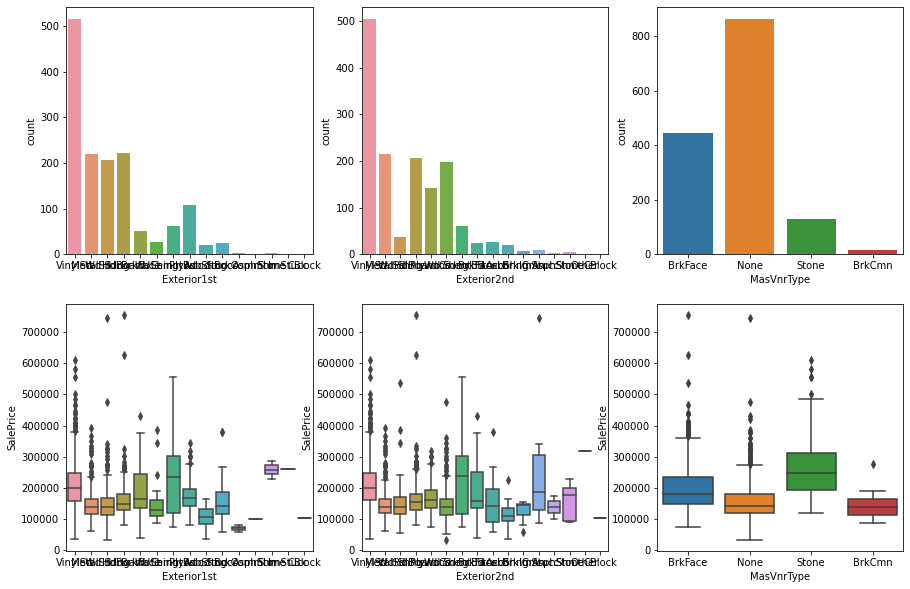

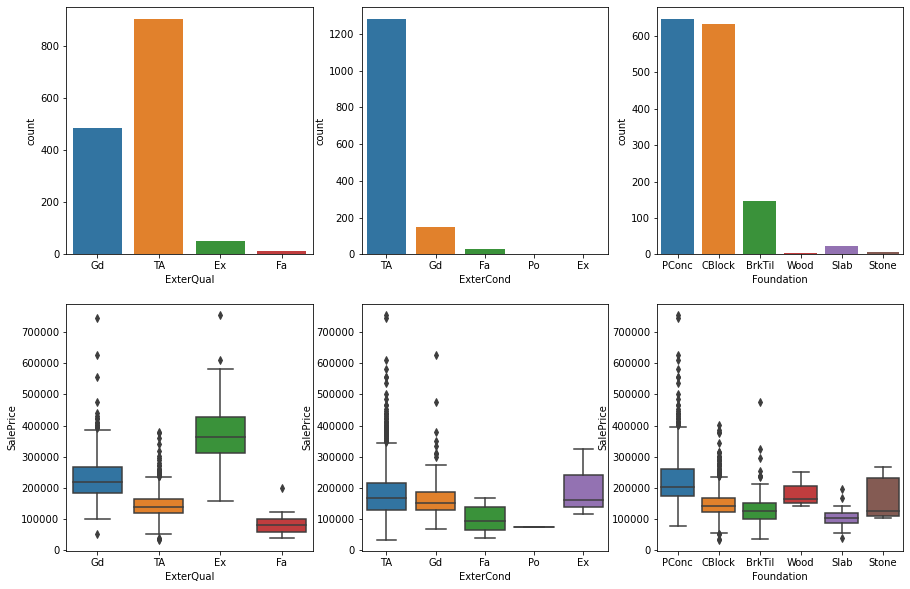

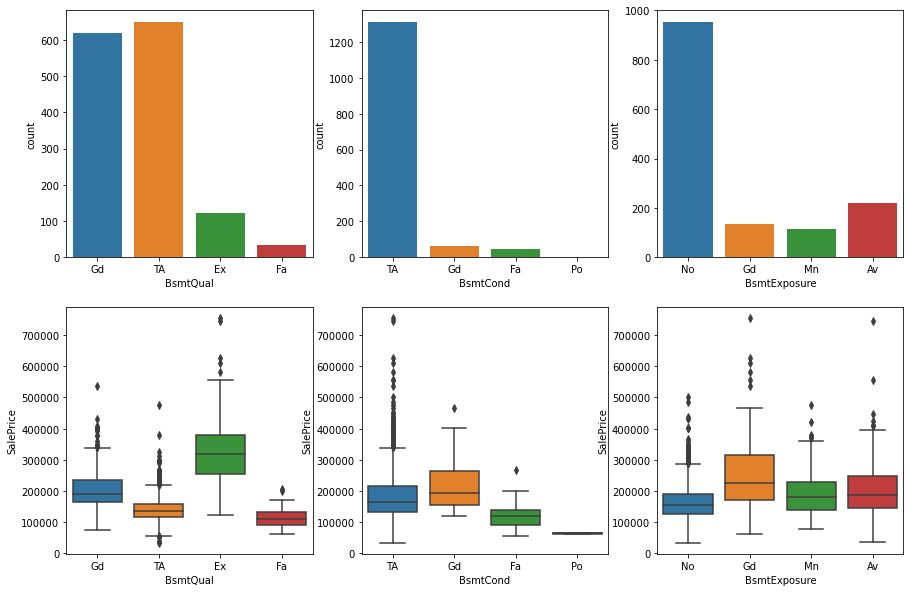

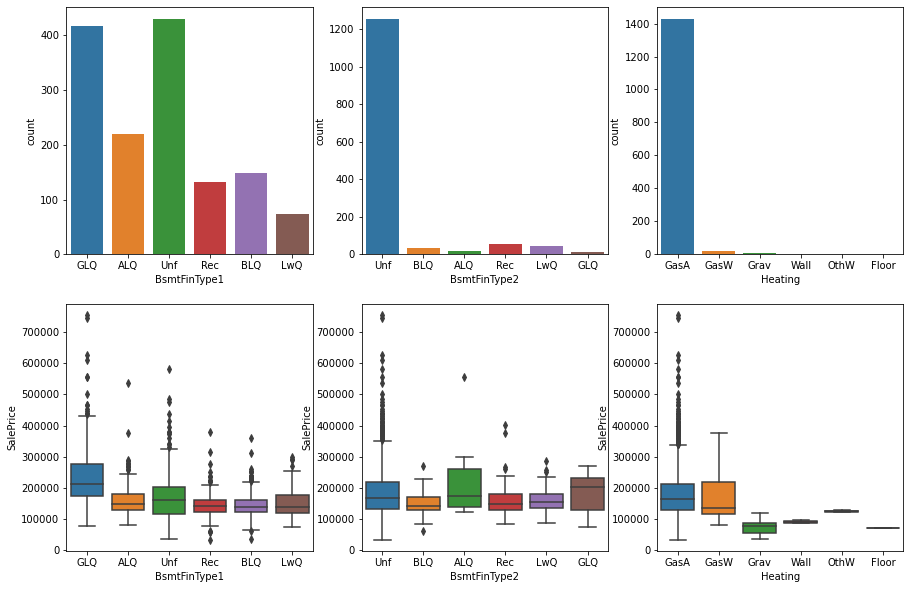

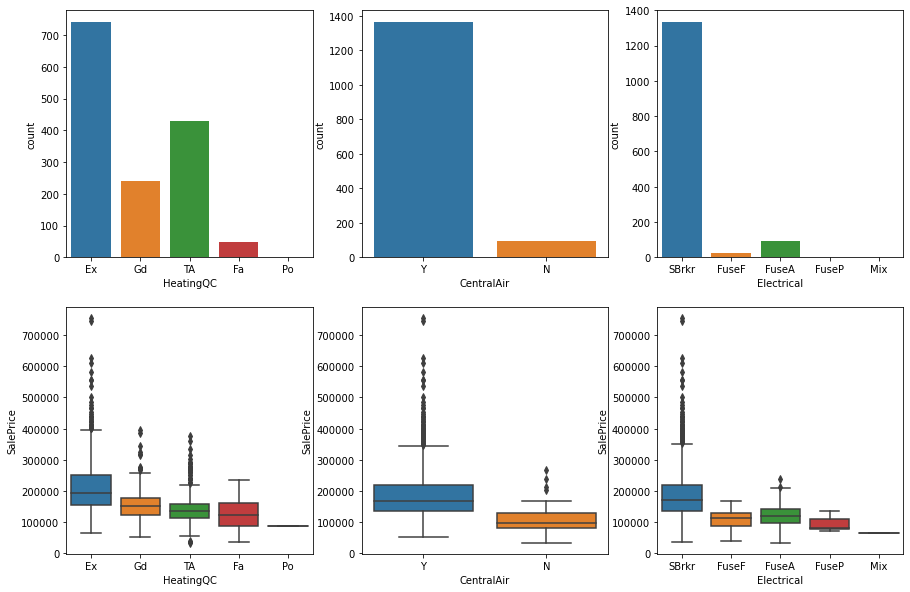

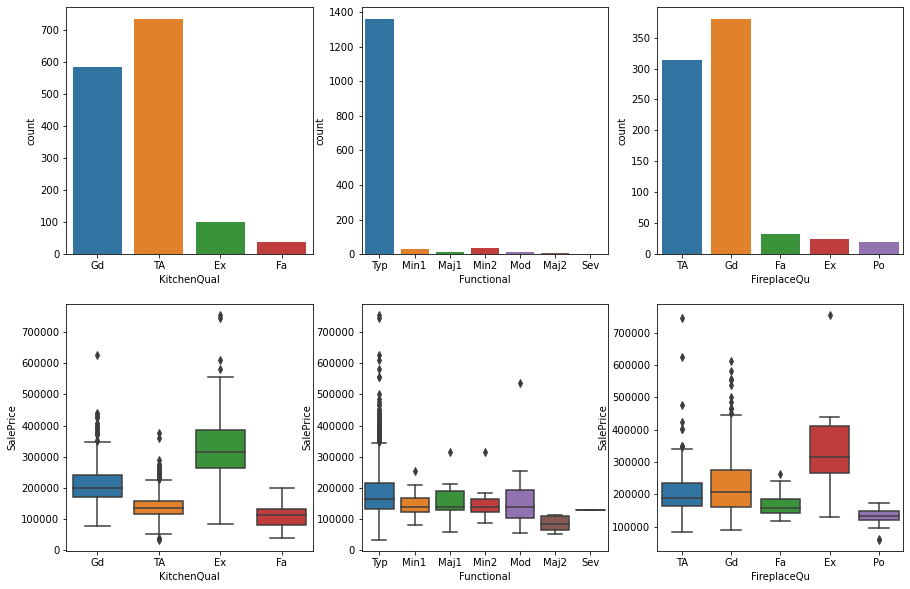

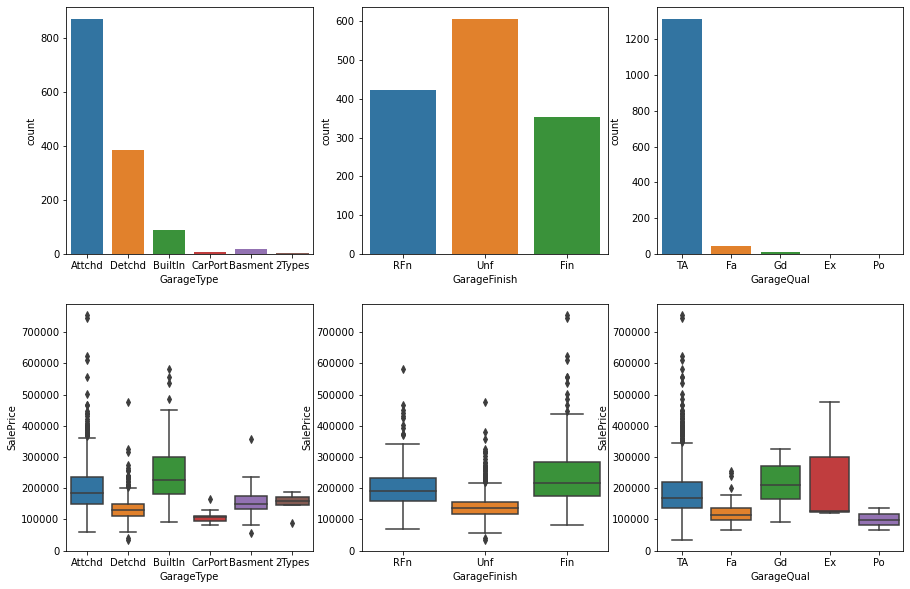

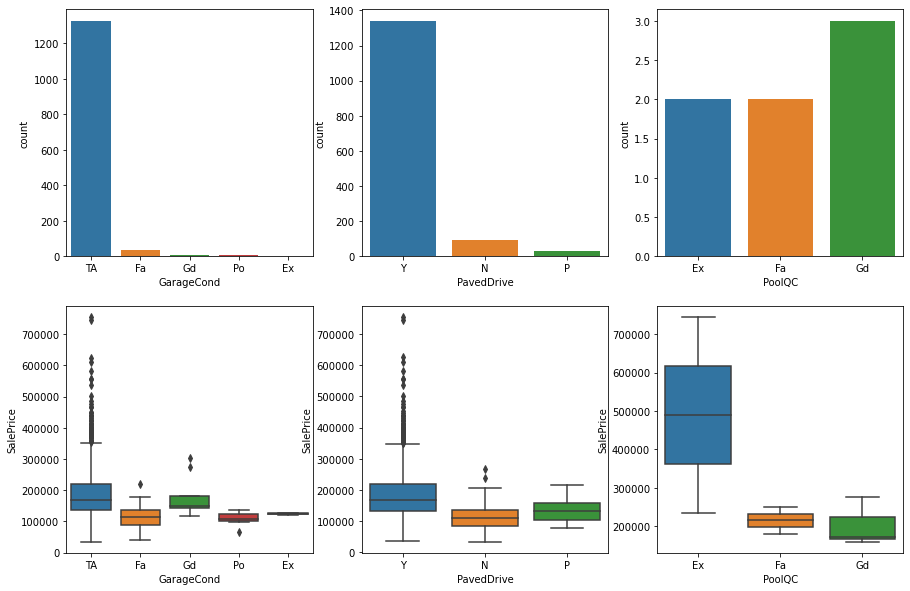

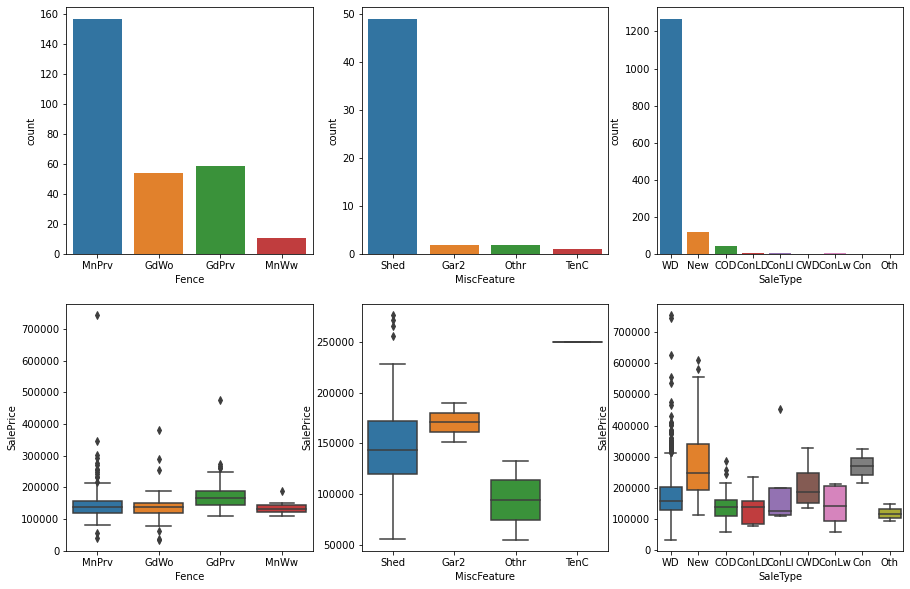

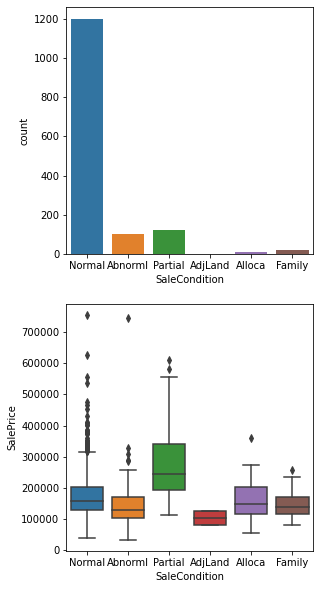

In [60]:
fig = plt.figure(figsize = (15,10))
for c in list(df_cat.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = df_cat, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=df_cat, x=c, y='SalePrice', ax=ax2)
            #sns.violinplot(data=ds_cat, x=c, y='SalePrice', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [61]:
df_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in df_cat.columns:
    tmp['column'] = [c]
    tmp['values'] = [df_cat[c].unique()]
    tmp['values_count_incna'] = len(list(df_cat[c].unique()))
    tmp['values_count_nona'] = int(df_cat[c].nunique())
    tmp['num_miss'] = df_cat[c].isnull().sum()
    tmp['pct_miss'] = (df_cat[c].isnull().sum()/ len(df_cat)).round(3)*100
    df_cat_stats = df_cat_stats.append(tmp)
    
df_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,MSZoning,"[RL, RM, C (all), FV, RH]",5,5,0,0.0
0,Street,"[Pave, Grvl]",2,2,0,0.0
0,Alley,"[nan, Grvl, Pave]",3,2,1369,93.8
0,LotShape,"[Reg, IR1, IR2, IR3]",4,4,0,0.0
0,LandContour,"[Lvl, Bnk, Low, HLS]",4,4,0,0.0
0,Utilities,"[AllPub, NoSeWa]",2,2,0,0.0
0,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5,5,0,0.0
0,LandSlope,"[Gtl, Mod, Sev]",3,3,0,0.0
0,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25,25,0,0.0
0,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9,9,0,0.0


In [62]:
# Let's do an Ascending sort on the Number of Distinct Categories for each categorical Variables
df_cat_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = True)

# And set the index to Column Names
df_cat_stats.set_index('column', inplace = True)
df_cat_stats

,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
Street,"[Pave, Grvl]",2,2,0,0.0
CentralAir,"[Y, N]",2,2,0,0.0
Utilities,"[AllPub, NoSeWa]",2,2,0,0.0
Alley,"[nan, Grvl, Pave]",3,2,1369,93.8
LandSlope,"[Gtl, Mod, Sev]",3,3,0,0.0
PavedDrive,"[Y, N, P]",3,3,0,0.0
PoolQC,"[nan, Ex, Fa, Gd]",4,3,1453,99.5
KitchenQual,"[Gd, TA, Ex, Fa]",4,4,0,0.0
GarageFinish,"[RFn, Unf, Fin, nan]",4,3,81,5.5
